# Grand Slam Analysis

## Data cleaning

In [11]:
import os
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import cufflinks as cf
from ipywidgets import interact
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


cf.go_offline()

# switch the working directory
os.chdir('/Users/johnngai/Desktop/final_project/ATP_matches_past_10_years_record/')

# Read the Grand Slam record csv file
data=pd.read_csv('grand_slam_past_10_years.csv')

# Function allows full display of columns
pd.set_option('display.max_columns',50)

# year=data['tourney_date'].apply(lambda x: x.year)

In [12]:
# Preview of data type
data.info()

# Column incomplete
# winner_entry, winner_seed, winner_ht, loser_seed, loser_entry, loser_ht,loser_age, loser_rank, 
# loser_rank_pints, minutes, all matches' stats

# Column remove
# winner_entry, winner_seed, loser_seed, loser_entry, winner_age, loser_age, winner_rank_points, loser_rank_points

data.drop(columns=['draw_size','match_num','winner_id','winner_seed','winner_entry','winner_age','winner_rank_points','loser_id','loser_seed','loser_entry','loser_age','loser_rank_points','best_of'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5588 entries, 0 to 5587
Data columns (total 49 columns):
tourney_id            5588 non-null object
tourney_name          5588 non-null object
surface               5588 non-null object
draw_size             5588 non-null float64
tourney_level         5588 non-null object
tourney_date          5588 non-null float64
match_num             5588 non-null float64
winner_id             5588 non-null float64
winner_seed           3266 non-null float64
winner_entry          388 non-null object
winner_name           5588 non-null object
winner_hand           5588 non-null object
winner_ht             5173 non-null float64
winner_ioc            5588 non-null object
winner_age            5588 non-null float64
winner_rank           5588 non-null float64
winner_rank_points    5588 non-null float64
loser_id              5588 non-null float64
loser_seed            1354 non-null float64
loser_entry           840 non-null object
loser_name            55

In [13]:
data.shape

(5588, 36)

In [14]:
data.head()

,tourney_id,tourney_name,surface,tourney_level,tourney_date,winner_name,winner_hand,winner_ht,winner_ioc,winner_rank,loser_name,loser_hand,loser_ht,loser_ioc,loser_rank,score,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,2018-580,Australian Open,Hard,G,20180115.0,Rafael Nadal,L,185.0,ESP,1.0,Victor Estrella,R,173.0,DOM,79.0,6-1 6-1 6-1,R128,94.0,2.0,1.0,66.0,48.0,37.0,12.0,11.0,5.0,6.0,1.0,1.0,61.0,40.0,19.0,5.0,10.0,4.0,12.0
1,2018-580,Australian Open,Hard,G,20180115.0,Leonardo Mayer,R,188.0,ARG,52.0,Nicolas Jarry,R,NaN,CHI,101.0,6-2 7-6(1) 6-3,R128,115.0,12.0,1.0,66.0,46.0,46.0,14.0,14.0,0.0,0.0,10.0,1.0,123.0,74.0,50.0,20.0,15.0,12.0,16.0
2,2018-580,Australian Open,Hard,G,20180115.0,John Millman,R,183.0,AUS,122.0,Borna Coric,R,NaN,CRO,46.0,7-5 6-4 6-1,R128,139.0,10.0,2.0,108.0,69.0,51.0,17.0,15.0,5.0,7.0,2.0,4.0,79.0,48.0,27.0,14.0,14.0,2.0,8.0
3,2018-580,Australian Open,Hard,G,20180115.0,Damir Dzumhur,R,172.0,BIH,30.0,Paolo Lorenzi,R,183.0,ITA,44.0,3-6 2-6 7-6(5) 6-2 6-4,R128,225.0,3.0,5.0,127.0,74.0,58.0,27.0,23.0,4.0,9.0,18.0,5.0,179.0,92.0,68.0,41.0,24.0,8.0,13.0
4,2018-580,Australian Open,Hard,G,20180115.0,Diego Sebastian Schwartzman,R,170.0,ARG,26.0,Dusan Lajovic,R,180.0,SRB,75.0,2-6 6-3 5-7 6-4 11-9,R128,239.0,14.0,7.0,189.0,109.0,68.0,40.0,30.0,14.0,25.0,6.0,8.0,183.0,126.0,78.0,24.0,29.0,13.0,24.0


In [15]:
# Standardise Grand Slam naming
data.replace({'tourney_name':'Us Open'},value='US Open', inplace=True)

In [16]:
# Change the tourney_date to type datetime64ns
data['tourney_date']=pd.to_datetime(data['tourney_date'].astype(str), format='%Y%m%d')

In [17]:
float_columns = data.select_dtypes(include=['float64'])

In [18]:
float_columns.columns

Index(['winner_ht', 'winner_rank', 'loser_ht', 'loser_rank', 'minutes',
       'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms',
       'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn',
       'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced'],
      dtype='object')

In [19]:
data_clean = data.dropna(subset=float_columns.columns)

In [20]:
data_clean.shape

(4365, 36)

In [21]:
data_clean[float_columns.columns] = data_clean[float_columns.columns].astype('int64')

In [22]:
data_clean.dtypes

tourney_id               object
tourney_name             object
surface                  object
tourney_level            object
tourney_date     datetime64[ns]
winner_name              object
winner_hand              object
winner_ht                 int64
winner_ioc               object
winner_rank               int64
loser_name               object
loser_hand               object
loser_ht                  int64
loser_ioc                object
loser_rank                int64
score                    object
round                    object
minutes                   int64
w_ace                     int64
w_df                      int64
w_svpt                    int64
w_1stIn                   int64
w_1stWon                  int64
w_2ndWon                  int64
w_SvGms                   int64
w_bpSaved                 int64
w_bpFaced                 int64
l_ace                     int64
l_df                      int64
l_svpt                    int64
l_1stIn                   int64
l_1stWon

In [23]:
# Take only the match statistics columns
match_stat_columns=data_clean.columns[31:]
match_stats=data_clean[match_stat_columns]

In [24]:
match_stats.head()

,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,19,5,10,4,12
3,68,41,24,8,13
4,78,24,29,13,24
6,40,17,16,9,16
7,48,20,19,0,4


In [25]:
# Display matches that have NaN in match stats rows
null_match_stats=match_stats[match_stats.isnull().any(axis=1)].index

# Overview of grand slam matches and year that have missing stats rows 
# A systematic loss of data e.g. counts are either 31 and 62 probably due to data unavailability 
# These rows are all to be deleted and the loss is quite balance among the 4 Grand Slam, not resulting in bias.
data_clean.iloc[null_match_stats,:].groupby(['tourney_name','tourney_id']).count()

# Drop all these rows
data_clean.drop(null_match_stats, inplace=True)

In [26]:
# split score cell into 6 columns by passing the parameter expand=True, default column label is 0,1,2,3,4,5
split_set_score=pd.DataFrame(data_clean['score'].str.split(expand=True))

# concatenate columns back to data
data_with_scores=pd.concat([data_clean,split_set_score], axis=1)


In [27]:
# Filter out rows with retire (meaning withdrawal of either one of players in a game)
scores_without_ret=data_with_scores[(data_with_scores[[0, 1, 2, 3, 4, 5]] != 'RET').all(axis=1)]


In [28]:
# Rename columns of set scores
scores_without_ret.rename(columns={0:'1st_set',1:'2nd_set',2:'3rd_set',3:'4th_set',4:'5th_set'},inplace=True)


In [29]:
# Drop column 5 as it originally contains 'RET', now it is all None
scores_without_ret.drop(columns=5,inplace=True)

In [30]:
scores_without_ret.shape

(4167, 41)

In [31]:
scores_without_ret.to_csv('grand_slam_database.csv')

In [32]:
# Compile the average ace in the winner column
avg_ace_w = scores_without_ret.groupby('winner_name')['w_ace'].mean().round(1)

In [33]:
height_w = scores_without_ret.groupby('winner_name')['winner_ht'].mean()

In [34]:
# Compile the average ace in the loser column
avg_ace_l = scores_without_ret.groupby('loser_name')['l_ace'].mean().round(1)

In [35]:
height_l = scores_without_ret.groupby('loser_name')['loser_ht'].mean()

In [36]:
# Combine winner and loser ace by outer join so that all players are taken into account
all_players=pd.concat([avg_ace_w,avg_ace_l], axis=1, join='outer')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [37]:
# Some players may never appear in the winner column, so the Nan is filled with zero and a mean of both columns is the avg no. of ace for that player.
all_players.fillna(0)
ace=all_players.mean(axis=1)

In [38]:
# Combine winner and loser height by outer join
all_height=pd.concat([height_w,height_l], axis=1, join='outer')


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [39]:
# Combine ace and height column by outer join
ace_height_combined=pd.concat([ace,all_height], axis=1, join='outer').drop(columns=['loser_ht'])

In [40]:
# Drop the Nan values and rename the column labels
ace_height_combined=ace_height_combined.dropna(axis=0).rename(columns={0:'Ace','winner_ht':'Height'})

In [41]:
# A brief look of the dataframe
ace_height_combined.sort_values('Ace',ascending=False).head()

,Ace,Height
Ivo Karlovic,29.25,208.0
John Isner,26.00,206.0
Ilija Bozoljac,25.75,193.0
Gilles Muller,21.20,193.0
Milos Raonic,20.70,196.0


In [42]:
# Create boxplot instances
trace0 = go.Box(x=ace_height_combined['Ace'],      # plot for Height
                boxpoints='all',                   # boxpoint style
                marker = dict(
                        color = 'rgb(8,81,156)',
                        outliercolor = 'rgba(219, 64, 82, 0.6)')
)
                
trace1 = go.Box(x=ace_height_combined['Height'],   # plot for Ace
               boxpoints='all',                    # boxpoint
               marker = dict(
                        color = 'rgb(60,81,156)',
                       )
)

data0=[trace0]
data1=[trace1]

# Create layout for Height boxplot
layout1 = dict(title = 'Boxplot of avg no. of Ace in Grand Slam',
               xaxis = dict(title= 'Avg. no. of Ace'))
#{'xaxis': {'showgrid':False,'zeroline':False, 'tickangle':60,'showticklabels':False}


# Create layout for Ace boxplot
layout2 = dict(title = 'Boxplot of players height in Grand Slam',
              xaxis = dict(title = 'Height'))

# Create boxplot object
fig1 = go.Figure(data=data0, layout=layout1)

fig2 = go.Figure(data=data1, layout=layout2)

# Execute plot
fig1.iplot(filename='box-plot1')

fig2.iplot(filename='box-plot2')







/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



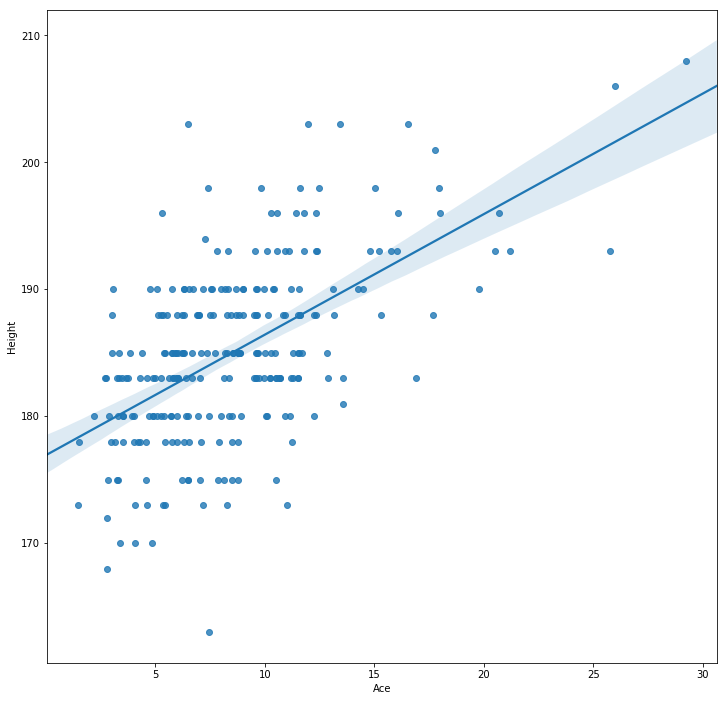

In [43]:
plt.figure(figsize=(12,12))
sns.regplot(x='Ace',y='Height',data=ace_height_combined)


In [44]:
# The correlation value
ace_height_combined.corr()

,Ace,Height
Ace,1.000000,0.575876
Height,0.575876,1.000000


## 2 sample T-test (independent variable)

In [45]:
# Get the Ace sample from tallest 50 players
short_sample=ace_height_combined.nsmallest(50,'Height')['Ace']

In [46]:
# Get the Ace sample from shortest 50 players
tall_sample=ace_height_combined.nlargest(50,'Height')['Ace']

In [47]:
# 2 Sample T-test independent variable
stats.ttest_ind(short_sample,tall_sample,equal_var=False)


Ttest_indResult(statistic=-8.50323378382352, pvalue=2.071807083652627e-12)

## Left hand player is harder to play against

In [48]:
# Replace U value in winner_hand to R, after verifying on internet the play hand of each of them
scores_without_ret.replace({'winner_hand':'U'},value='R',inplace=True)

In [49]:
# Double check
scores_without_ret['winner_hand'].unique()

array(['L', 'R'], dtype=object)

In [50]:
# Replace U value in loser_hand to R, after verifying on internet the play hand of each of them
scores_without_ret.replace({'loser_hand':'U'},value='R',inplace=True)

In [51]:
# Double check
scores_without_ret['loser_hand'].unique()

array(['R', 'L'], dtype=object)

In [52]:
# assign to new name for further analysing
u_hand_eliminate=scores_without_ret

In [53]:
u_hand_eliminate.groupby(['loser_hand','winner_hand']).count()

tourney_id  tourney_name  surface  tourney_level  \
loser_hand winner_hand                                                     
L          L                    86            86       86             86   
           R                   477           477      477            477   
R          L                   463           463      463            463   
           R                  3141          3141     3141           3141   

                        tourney_date  winner_name  winner_ht  winner_ioc  \
loser_hand winner_hand                                                     
L          L                      86           86         86          86   
           R                     477          477        477         477   
R          L                     463          463        463         463   
           R                    3141         3141       3141        3141   

                        winner_rank  loser_name  loser_ht  loser_ioc  \
loser_hand winner_hand                                                 
L          L                     86          86        86         86   
           R                    477         477       477        477   
R          L                    463         463       463        463   
           R                   3141        3141      3141       3141   

                        loser_rank  score  round  minutes  w_ace  w_df  \
loser_hand winner_hand                                                   
L          L                    86     86     86       86     86    86   
           R                   477    477    477      477    477   477   
R          L                   463    463    463      463    463   463   
           R                  3141   3141   3141     3141   3141  3141   

                        w_svpt  w_1stIn  w_1stWon  w_2ndWon  w_SvGms  \
loser_hand winner_hand                                                 
L          L                86       86        86        86       86   
           R               477      477       477       477      477   
R          L               463      463       463       463      463   
           R              3141     3141      3141      3141     3141   

                        w_bpSaved  w_bpFaced  l_ace  l_df  l_svpt  l_1stIn  \
loser_hand winner_hand                                                       
L          L                   86         86     86    86      86       86   
           R                  477        477    477   477     477      477   
R          L                  463        463    463   463     463      463   
           R                 3141       3141   3141  3141    3141     3141   

                        l_1stWon  l_2ndWon  l_SvGms  l_bpSaved  l_bpFaced  \
loser_hand winner_hand                                                      
L          L                  86        86       86         86         86   
           R                 477       477      477        477        477   
R          L                 463       463      463        463        463   
           R                3141      3141     3141       3141       3141   

                        1st_set  2nd_set  3rd_set  4th_set  5th_set  
loser_hand winner_hand                                               
L          L                 86       86       86       35       11  
           R                477      477      477      216       86  
R          L                463      463      463      222       97  
           R               3141     3141     3140     1549      577

In [54]:
l_r=u_hand_eliminate[u_hand_eliminate['winner_hand']!=u_hand_eliminate['loser_hand']].groupby('winner_hand').count()

In [55]:
l_r.reset_index()

,winner_hand,tourney_id,tourney_name,surface,tourney_level,tourney_date,winner_name,winner_ht,winner_ioc,winner_rank,loser_name,loser_hand,loser_ht,loser_ioc,loser_rank,score,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,1st_set,2nd_set,3rd_set,4th_set,5th_set
0,L,463,463,463,463,463,463,463,463,463,463,463,463,463,463,463,463,463,463,463,463,463,463,463,463,463,463,463,463,463,463,463,463,463,463,463,463,463,463,222,97
1,R,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,216,86


In [56]:
# Assigning dataframe values to variable
l=l_r['winner_name'][0]
r=l_r['winner_name'][1]
label=[l_r['winner_name'][0],l_r['winner_name'][1]]

In [57]:
# Create figure object plotly
fig =go.Figure( {
    "data": [
      {
      "values": [l, r],
      "labels": ['Left-handed player','Right-handed player'
      ],
      "text":["Left-handed","Right-handed"],
      "textposition":"inside",
      
      "name": "CO2 Emissions",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
    
    "layout": {
        "title":"Left-handed VS Right-handed player",
        "annotations": [
            {
                "font": {
                    "size": 30
                },
                "showarrow": False,
                "text": "Winner",
                "x": 0.5,
                "y": 0.5
            }]
    }
})

fig.iplot(filename='piechart')


            

## Correlation of rank difference and number of sets played

In [58]:
scores_without_ret[scores_without_ret.winner_rank>scores_without_ret.loser_rank].count()

tourney_id       1093
tourney_name     1093
surface          1093
tourney_level    1093
tourney_date     1093
winner_name      1093
winner_hand      1093
winner_ht        1093
winner_ioc       1093
winner_rank      1093
loser_name       1093
loser_hand       1093
loser_ht         1093
loser_ioc        1093
loser_rank       1093
score            1093
round            1093
minutes          1093
w_ace            1093
w_df             1093
w_svpt           1093
w_1stIn          1093
w_1stWon         1093
w_2ndWon         1093
w_SvGms          1093
w_bpSaved        1093
w_bpFaced        1093
l_ace            1093
l_df             1093
l_svpt           1093
l_1stIn          1093
l_1stWon         1093
l_2ndWon         1093
l_SvGms          1093
l_bpSaved        1093
l_bpFaced        1093
1st_set          1093
2nd_set          1093
3rd_set          1093
4th_set           676
5th_set           301
dtype: int64

In [59]:
import numpy as np
scores_without_ret['winner_higher_ranking']=np.where(scores_without_ret.winner_rank> scores_without_ret.loser_rank,'no','yes')

winner_high_ranking=scores_without_ret.groupby(['winner_higher_ranking']).count()

In [60]:
no=winner_high_ranking['winner_name'][0]
yes=winner_high_ranking['winner_name'][1]

In [61]:
# Create figure object plotly
fig2 =go.Figure( {
    "data": [
      {
      "values": [no, yes],
      "labels": ['winner has lower ranking','winner has higher ranking'],
      "textposition":"inside",
      
      "name": "CO2 Emissions",
      "hoverinfo":"label+percent+name",
      "type": "pie"
    }],
    
    "layout": {
        "title":"Is higher ranking player more likely to win?",
        
    }
})

fig2.iplot(filename='piechart')


In [62]:
# Count the Non-Na value across each row meaning the number of set played in a match
set_play=scores_without_ret[['1st_set','2nd_set','3rd_set','4th_set','5th_set']].count(axis=1)

scores_without_ret['set_played']=set_play
#scores_without_ret.groupby(['set_played']).count()


valid_match=scores_without_ret[(scores_without_ret.set_played>=3) & (scores_without_ret.winner_rank<=50) & (scores_without_ret.loser_rank<=50)]
valid_match['rank_difference']=valid_match.loser_rank-valid_match.winner_rank


In [63]:
valid_match_plot=valid_match[['set_played','rank_difference']]

In [64]:
valid_match_plot['rank_difference']=valid_match_plot['rank_difference'].abs()

In [65]:
valid_match_plot['bin']=pd.cut(valid_match_plot['rank_difference'],5,labels=['<10','<20','<30','<40','<50'])


In [66]:
v=valid_match_plot.groupby(['bin']).mean().reset_index()

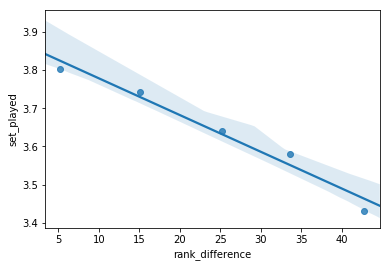

In [67]:
sns.regplot(x=v['rank_difference'],y=v['set_played'],data=v)

In [68]:
v[['rank_difference','set_played']].corr()

,rank_difference,set_played
rank_difference,1.000000,-0.984863
set_played,-0.984863,1.000000


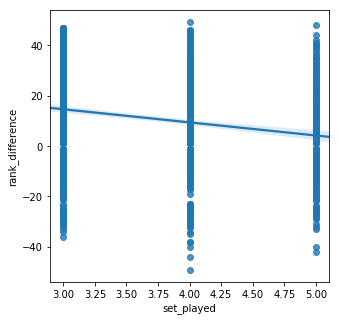

In [69]:
plt.figure(figsize=(5,5))
sns.regplot(x='set_played',y='rank_difference',data=valid_match)

## breakpoint percentage

 ## (w_1stWon+w_2ndwon)+(l_1stWon+l_2ndwon)/w_svpt+l_svpt   

## w_bpSaved+l_bpSaved/w_bpFaced+l_bpFaced

In [80]:
top10player=['Novak Djokovic','Rafael Nadal','Roger Federer','Dominic Thiem','Kevin Anderson','Kei Nishikori','John Isner','Juan Martin Del Potro','Marin Cilic','Fabio Fognini']


In [103]:
top50player=['Nick Kyrgios','Marton Fucsovics','Joao Sousa','Fernando Verdasco','Richard Gasquet','John Millman','Mikhail Kukushkin','Thomas Fabianno','Hugo Dellien','Feliciano Lopez','Jiri Vesely','Lucas Pouille','Mischa Zverev','Guido Andreozzi','Alexander Bublik','Jo-Wilfried Tsonga','Ricardas Berankis''Matteo Berrettini','Adrian Mannarino','Reilly Opelka']


In [104]:
def svpt_bppt_stat_calculator(df,list_of_player):
    winner_col=df[df['winner_name'].isin(list_of_player)]
    loser_col=df[df['loser_name'].isin(list_of_player)]
    winner_data=winner_col.groupby('winner_name').sum()[['w_svpt','w_1stWon','w_2ndWon','w_bpSaved','w_bpFaced']]
    loser_data=loser_col.groupby('loser_name').sum()[['l_svpt','l_1stWon','l_2ndWon','l_bpSaved','l_bpFaced']]
    all_data=pd.concat([winner_data,loser_data], axis=1)
    all_data['svpt_%']=round(((all_data.w_1stWon+all_data.w_2ndWon)+(all_data.l_1stWon+all_data.l_2ndWon))/(all_data.w_svpt+all_data.l_svpt),3)*100
    all_data['bppt_%']=round((all_data.w_bpSaved+all_data.l_bpSaved)/(all_data.w_bpFaced+all_data.l_bpFaced),3)*100
    all_data['svpt_minus_bppt']=all_data['svpt_%']-all_data['bppt_%']
    return all_data
    

In [92]:
data1=svpt_bppt_stat_calculator(scores_without_ret,top10player)

In [94]:
data1.svpt_minus_bppt.mean()

2.4899999999999984

In [88]:
data1['ranking']=[5,11,9,8,7,6,10,1,2,4]

In [89]:
d1=data1.sort_values('ranking')

In [105]:
data2=svpt_bppt_stat_calculator(scores_without_ret,top50player)

In [106]:
data2['ranking']=[41,42,43,44,45,46,47,48,49,50]

In [107]:
d2=data2.sort_values('ranking')

In [108]:
data2.svpt_minus_bppt.mean()

3.3299999999999974

In [109]:
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import cufflinks as cf
from ipywidgets import interact

cf.go_offline()


trace0 = go.Scatter(
    x = d1.index,
    y = d1['svpt_%'],
    mode = 'lines+markers',
    name = 'serve point %',
    line = dict(
        color = ('rgb(255, 165, 0)'),
        width = 6,
                )
)

trace1 = go.Scatter(
    x = d1.index,
    y = d1['bppt_%'],
    mode = 'lines+markers',
    name = 'break point %',
    line = dict(
        color = ('rgb(255, 165, 0)'),
        width = 6,
        dash='dot'
                )
)

trace2 = go.Scatter(
    x = d2.index,
    y = d2['svpt_%'],
    mode = 'lines+markers',
    name = 'serve point %',
    line = dict(
        color = ('rgb(30,144,255)'),
        width = 6,
                )
)

trace3 = go.Scatter(
    x = d2.index,
    y = d2['bppt_%'],
    mode = 'lines+markers',
    name = 'break point %',
    line = dict(
        color = ('rgb(30,144,255)'),
        width = 6,
        dash='dot'
                )
)



layout = dict(title = 'Comparison of top10 and top50 ',
               xaxis = dict(title= 'Player'),
               yaxis = dict(title= 'Serve Point % / Break Point %'))

data10 = [trace0,trace1]

fig1 = go.Figure(data=data10, layout=layout)
plt.figure(figsize=(20,20))


fig1.iplot(filename='line-mode')

data50 =[trace2,trace3]

fig2 = go.Figure(data=data50, layout=layout)
fig2.iplot(filename='line-mode')

<Figure size 1440x1440 with 0 Axes>